<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [2]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open('./estados-bruto.xml', 'r', encoding= 'utf8'), 'lxml')

<ipython-input-2-ffbbbc96fe37>:7: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  fonte = BeautifulSoup(open('./estados-bruto.xml', 'r', encoding= 'utf8'), 'lxml')


In [3]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [ ]:
# manipule os dados

# continue o codigo aqui

In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import csv

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui

# Abrir o arquivo CSV em modo de escrita
with open(NOME_ARQUIVO_DESTINO, 'w', newline='', encoding='utf-8') as csvfile:
  fieldnames = ['estado', 'sigla', 'região']
  writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=';')
  writer.writeheader()

  for estado in fonte('estado'):
    # Extrair os dados do estado
    nome = estado.find('nome').text
    sigla = estado.find('sigla').text
    regiao = estado.find('regiao').text

    # Escrever os dados do estado no arquivo CSV
    writer.writerow({'estado': nome, 'sigla': sigla, 'região': regiao})

print(f'Dados exportados para {NOME_ARQUIVO_DESTINO} com sucesso!')

Dados exportados para estados-limpo.csv com sucesso!


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [12]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE, delimiter=',')

In [13]:
# visualize os resultados

fonte.head(n=11)

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
5,vw_pib_percapita.fid-4514e25a_17aaa325034_-258a,3403,MINAS GERAIS,Pedra Azul,2010.0,1.875237e+05,26000,7212.450195,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.13919020068422 -15.7676618...
6,vw_pib_percapita.fid-4514e25a_17aaa325034_-2589,1029,PIAUÍ,Teresina,2010.0,8.700461e+06,802537,10841.200195,Produto Interno Bruto per capita,9639.65 - 22144.80,2,"POLYGON ((-42.8185079355695 -4.78962098497423,..."
7,vw_pib_percapita.fid-4514e25a_17aaa325034_-2588,5153,PIAUÍ,Amarante,2010.0,6.532289e+04,17892,3650.949951,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-42.71910579976566 -6.19917695...
8,vw_pib_percapita.fid-4514e25a_17aaa325034_-2587,1048,GOIÁS,Matrinchã,2010.0,4.591055e+04,4420,10387.000000,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.72714210104406 -15.2513293...
9,vw_pib_percapita.fid-4514e25a_17aaa325034_-2586,2629,PERNAMBUCO,Cachoeirinha,2010.0,8.043380e+04,18123,4438.220215,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-36.223332486171294 -8.4536885...


In [7]:
# manipule os dados

# continue o codigo aqui
dados_limpos = fonte[fonte['Censo'] == 2010.0][['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]
# Renomear as colunas
dados_limpos = dados_limpos.rename(columns={'UF':'estado', 'nome':'cidade', 'Pop_est_2009':'populacao', 'PIB':'pib', 'PIB_percapita':'pib_percapita'})

# Exibir as três primeiras linhas e o cabeçalho dos dados filtrados
print(dados_limpos.head)

<bound method NDFrame.head of                  estado            cidade  populacao           pib  \
0                 BAHIA          Tremedal      18433  5.788399e+04   
1     RIO GRANDE DO SUL            Turuçu       4000  4.572388e+04   
2        ESPIRITO SANTO           Vitória     320156  1.978263e+07   
3          MINAS GERAIS         Jacutinga      21424  2.478160e+05   
4                 PIAUÍ           Nazária       7895  2.095138e+04   
...                 ...               ...        ...           ...   
5561     SANTA CATARINA         Campo Erê       9737  1.876289e+05   
5562             PARANÁ          Planalto      13983  1.385535e+05   
5563          SÃO PAULO        Guararapes      29639  5.320191e+05   
5564  RIO GRANDE DO SUL  Barra do Guarita       3067  2.198064e+04   
5565  RIO GRANDE DO SUL        Machadinho       5623  5.715017e+04   

      pib_percapita  
0       3140.239990  
1      11430.969727  
2      61790.589844  
3      11567.209961  
4       2653.750000

In [14]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# Salvar os dados extraídos no arquivo cidades-limpo.csv separados por ponto e vírgula
dados_limpos.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)

print(f"Dados exportados para {NOME_ARQUIVO_DESTINO} com sucesso!")

Dados exportados para cidades-limpo.csv com sucesso!


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [28]:
# solução do exercício 1.3
# Carregar os arquivos CSV em DataFrames
df_estados = pd.read_csv('estados-limpo.csv', delimiter=';')
df_cidades = pd.read_csv('cidades-limpo.csv', delimiter=';')

In [29]:
from unidecode import unidecode

# Função para remover acentos
def remover_acentos(texto):
    return unidecode(texto)

# Aplica a função para remover acentos dos estados
df_cidades['estado'] = df_cidades['estado'].apply(remover_acentos)

In [30]:
df_brasil = pd.merge(df_cidades, df_estados, on='estado', how='inner')

In [27]:
df_brasil

,estado,cidade,populacao,pib,pib_percapita,sigla,região
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5550,AMAPA,Serra do Navio,3982,1.097953e+05,27572.900391,AP,NORTE
5551,AMAPA,Ferreira Gomes,5475,6.993773e+04,12774.009766,AP,NORTE
5552,AMAPA,Tartarugalzinho,13769,1.199880e+05,8714.360352,AP,NORTE
5553,AMAPA,Macapá,366484,4.679694e+06,12769.160156,AP,NORTE


In [31]:
df_brasil.to_csv('brasil.csv', index=False)

print("Dados exportados para brasil.csv com sucesso!")

Dados exportados para brasil.csv com sucesso!


## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [37]:
# solução do exercício 2.1
brasil_df = pd.read_csv('brasil.csv')

In [38]:
df_brasil.isnull()

,estado,cidade,populacao,pib,pib_percapita,sigla,região
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5550,False,False,False,False,False,False,False
5551,False,False,False,False,False,False,False
5552,False,False,False,False,False,False,False
5553,False,False,False,False,False,False,False


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [35]:
# código para responder a pergunta
populacao_por_cidade = brasil_df.groupby('cidade')['populacao'].sum()

# Ordenar as cidades pela população em ordem decrescente e selecionar as 10 primeiras
top_10_populosas = populacao_por_cidade.sort_values(ascending=False).head(10)

top_10_populosas

cidade
São Paulo         11037593
Rio de Janeiro     6186710
Salvador           2998056
Brasília           2606885
Fortaleza          2505552
Belo Horizonte     2452617
Curitiba           1851215
Manaus             1738641
Recife             1561659
Belém              1460429
Name: populacao, dtype: int64

 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [39]:
# código para responder a pergunta
cidades_nordeste = brasil_df[brasil_df['região'] == 'NORDESTE']

# Ordenar as cidades filtradas pela coluna 'pip_percapita' em ordem crescente
cidades_nordeste_ordenadas = cidades_nordeste.sort_values(by='pib_percapita').head(5)

print(cidades_nordeste_ordenadas[['cidade', 'pib_percapita']])

                  cidade  pib_percapita
4464  São Vicente Ferrer    1929.969971
4359             Cajapió    2203.830078
1848       Dom Inocêncio    2358.239990
4483            Timbiras    2368.159912
4380               Axixá    2416.969971


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [41]:
# código para responder a pergunta
cidades_sp = brasil_df[brasil_df['estado'] == 'SAO PAULO']

# Ordenar as cidades filtradas pela coluna 'pip' em ordem decrescente
cidades_sp_ordenadas = cidades_sp.sort_values(by='pib', ascending=False).head(15)

print(cidades_sp_ordenadas[['cidade', 'pib']])

                     cidade          pib
3271              São Paulo  389317152.0
3223              Guarulhos   32473828.0
3340               Campinas   31654720.0
3106                 Osasco   31616452.0
2810  São Bernardo do Campo   28935768.0
3344                Barueri   26908070.0
2768                 Santos   22546134.0
2994    São José dos Campos   22018042.0
3014                Jundiaí   16585137.0
2816            Santo André   14709603.0
2754         Ribeirão Preto   14688064.0
3152               Sorocaba   14182597.0
3038                Diadema    9969819.0
3334             Piracicaba    9601211.0
2999     São Caetano do Sul    8920202.0


 - Qual é o PIB do estado de Santa Catarina?

In [42]:
# código para responder a pergunta
sc_df = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']

# Calcular a soma do estado de Santa Catarina
pib_sc = sc_df['pib'].sum()

print('Pib do estado de Santa Catarina:', pib_sc)

Pib do estado de Santa Catarina: 129806256.75195317


 - Qual é o população da região sul?

In [43]:
# código para responder a pergunta
sul_df = brasil_df[brasil_df['região'] == 'SUL']

# Calcular a soma da população da região sul
populacao_sul = sul_df['populacao'].sum()

print('População da região sul:', populacao_sul)

População da região sul: 27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [44]:
# código para responder a pergunta
grupo_por_estado = brasil_df.groupby('estado')

# Calcular o PIB per capita médio para cada estado
pib_per_capita_medio_por_estado = grupo_por_estado.apply(lambda grupo: (grupo['pib'] / grupo['populacao']).mean())

# Exibir o PIB per capita médio das cidades do Mato Grosso do Sul
print("PIB per capita médio das cidades do Mato Grosso do Sul:", pib_per_capita_medio_por_estado['MATO GROSSO DO SUL'])

PIB per capita médio das cidades do Mato Grosso do Sul: 14.45889663020474


 - Qual é a população do Brasil?

In [45]:
# código para responder a pergunta
populacao_brasil = brasil_df['populacao'].sum()

# Exibir a população total do Brasil
print("População total do Brasil:", populacao_brasil)

População total do Brasil: 191176146


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

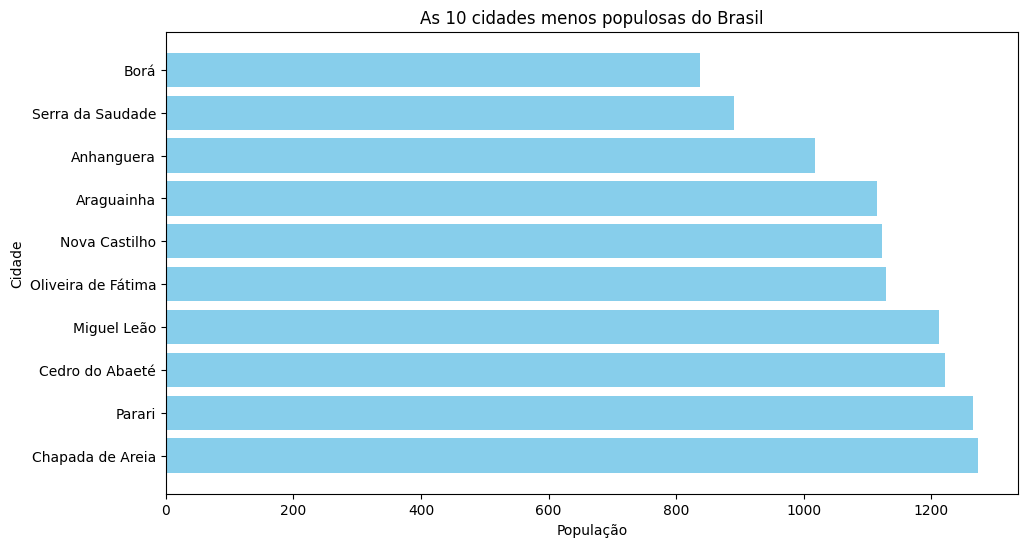

In [46]:
# código para gerar a visualização
import matplotlib.pyplot as plt

# Filtrar o DataFrame para incluir apenas as colunas 'cidade' e 'populacao'
cidades_populacao = brasil_df[['cidade', 'populacao']]

# Ordenar as cidades pela população em ordem crescente
cidades_menos_populosas = cidades_populacao.sort_values(by='populacao').head(10)

# Criar o gráfico de barras
plt.figure(figsize=(11, 6))
plt.barh(cidades_menos_populosas['cidade'], cidades_menos_populosas['populacao'], color='skyblue')
plt.xlabel('População')
plt.ylabel('Cidade')
plt.title('As 10 cidades menos populosas do Brasil')
plt.gca().invert_yaxis()  # Inverter o eixo y para ter a cidade com a menor população no topo

plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

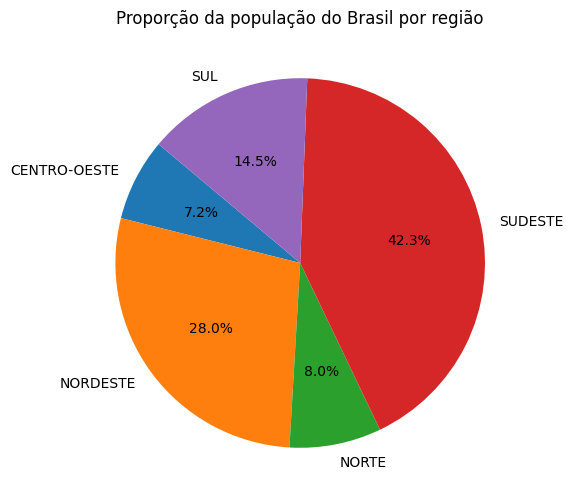

In [47]:
# código para gerar a visualização
# Agrupar o DataFrame pela coluna 'região' e calcular a soma da população para cada região
populacao_por_regiao = brasil_df.groupby('região')['populacao'].sum()

# Plotar um gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(populacao_por_regiao, labels=populacao_por_regiao.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporção da população do Brasil por região')

plt.show()